# Method to Estimate DM_Host_Halo

In [69]:
# import
from importlib import reload
import numpy as np

from matplotlib import pyplot as plt

from astropy import units
from astropy.cosmology import Planck15 as cosmo
from astropy.coordinates import SkyCoord

from frb import halos
from frb.frb import FRB
from frb.halos import models
from frb.dm import host as dm_host
from frb.figures import utils as fig_utils

# First, let's compare the enclosed mass

## Simple L* galaxy

In [12]:
mNFW = models.ModifiedNFW(alpha=2., y0=2.)
mNFW_1 = models.ModifiedNFW(alpha=2., y0=1.)

In [78]:
y = np.linspace(0.05, 15., 1000)

In [79]:
f_DM = mNFW.fy_dm(y)
f_b = mNFW.fy_b(y)
#
f_DM_1 = mNFW_1.fy_dm(y)
f_b_1 = mNFW_1.fy_b(y)


## Set each to 1 at $y=c=7.7$

In [113]:
c=7.7
#c=3.
idx_1 = np.argmin(np.abs(y-c))
f_DM = f_DM / f_DM[idx_1]
f_b = f_b / f_b[idx_1]
#
f_DM_1 = f_DM_1 / f_DM_1[idx_1]
f_b_1 = f_b_1 / f_b_1[idx_1]

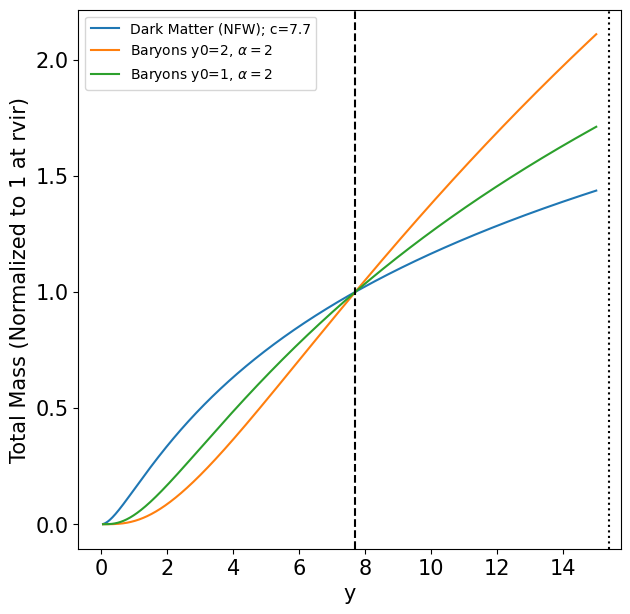

In [114]:
fig = plt.figure(figsize=(7,7))
ax = plt.gca()
#
ax.plot(y, f_DM, label='Dark Matter (NFW); '+f'c={c}')
ax.plot(y, f_b, label=r'Baryons y0=2, $\alpha=2$')
#
ax.plot(y, f_b_1, label=r'Baryons y0=1, $\alpha=2$')
#
ax.axvline(c*1, ls='--', color='k')
ax.axvline(c*2, ls=':', color='k')
#
ax.legend()
ax.set_xlabel('y')
ax.set_ylabel('Total Mass (Normalized to 1 at rvir)')
#
if c == 3.:
    ax.set_xlim(0., 7.)
    ax.set_ylim(0., 4.5)
#
fig_utils.set_fontsize(ax,15)
plt.savefig(f'fig_mass_{c}.png', dpi=300)
plt.show()

# Slope of the density

In [82]:
def n(y, alpha=0., y0=1.):
    denom = y**(1-alpha) * (y0 + y)**(2+alpha)
    return 1. / denom

In [115]:
#y = np.linspace(0.05, 3., 10000)
n_dm = n(y)
n_b2 = n(y, y0=2, alpha=2)
n_b1 = n(y, y0=1, alpha=2)

## Slope

In [116]:
dn_dm = n_dm - np.roll(n_dm,1)
dn_b1 = n_b1 - np.roll(n_b1,1)
dn_b2 = n_b2 - np.roll(n_b2,1)

In [117]:
beta_dm = dn_dm[1:] * y[1:] / (y[1]-y[0]) / n_dm[1:]
beta_b1 = dn_b1[1:] * y[1:] / (y[1]-y[0]) / n_b1[1:]
beta_b2 = dn_b2[1:] * y[1:] / (y[1]-y[0]) / n_b2[1:]

beta_dm[idx_1], beta_dm[-1]

(np.float64(-2.780400644243008), np.float64(-2.880507624319439))

## Plot

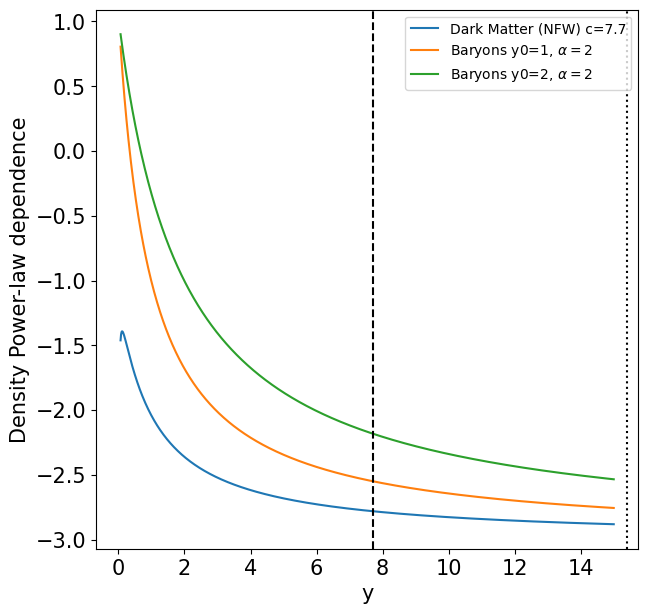

In [118]:
fig = plt.figure(figsize=(7,7))
ax = plt.gca()
#
ax.plot(y[1:], beta_dm, label='Dark Matter (NFW)'+f' c={c}')
ax.plot(y[1:], beta_b1, label=r'Baryons y0=1, $\alpha=2$')
#
ax.plot(y[1:], beta_b2, label=r'Baryons y0=2, $\alpha=2$')
#
ax.axvline(c*1, ls='--', color='k')
ax.axvline(c*2, ls=':', color='k')
#
ax.legend()
ax.set_xlabel('y')
ax.set_ylabel('Density Power-law dependence')
#ax.set_xscale('log')
fig_utils.set_fontsize(ax, 15)
#
plt.savefig('fig_beta.png', dpi=300)
plt.show()